<a href="https://colab.research.google.com/github/Jana-ekram/AI-Project/blob/main/Copy_of_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


***Importing the data set from Kaggle***

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

try:
    data = pd.read_csv('ecommerce_customer_data_custom_ratios.csv')
except:
    data = pd.read_csv('https://raw.githubusercontent.com/Jana-ekram/AI-Project/refs/heads/main/ecommerce_customer_data_custom_ratios.csv?token=GHSAT0AAAAAACZ6ODJYPJV7DGQKBB3IPEJOZZI3QUA')

data.head()




,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


Analysis of the chosen attributes.


Means:
 Product Price             254.659512
Quantity                    2.998896
Total Purchase Amount    2725.370732
Customer Age               43.940528
Returns                     0.497861
dtype: float64

Medians:
 Product Price             255.0
Quantity                    3.0
Total Purchase Amount    2724.0
Customer Age               44.0
Returns                     0.0
dtype: float64

Standard Deviation for Numerical Attributes:
 Product Price             141.568577
Quantity                    1.414694
Total Purchase Amount    1442.933565
Customer Age               15.350246
Returns                     0.499997
dtype: float64

Modes for All Attributes:
Product Category: Clothing
Product Price: 100
Quantity: 1
Total Purchase Amount: 2786
Payment Method: Credit Card
Customer Age: 58
Returns: 0.0
Gender: Female

Entropy Values for All Relevant Attributes:
Product Category: 1.3662146996291606
Product Price: 4.141864054395153
Quantity: 1.6094366601310373
Total Purchase Amount: 4.181

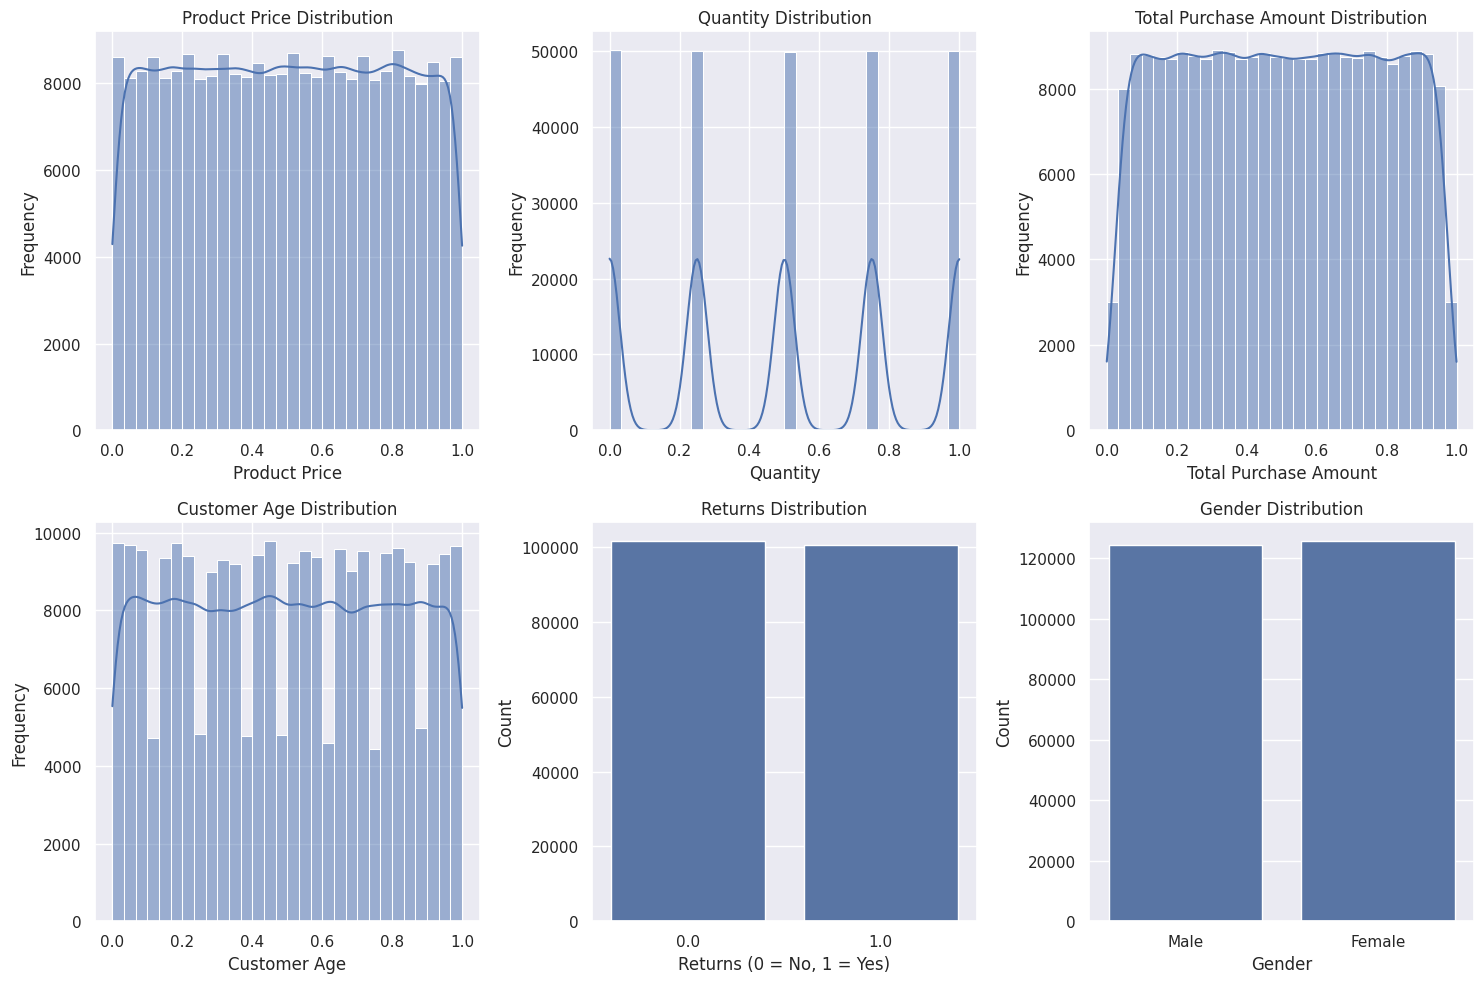


Correlation Values for Numerical Attributes:
                       Product Price  Quantity  Total Purchase Amount  \
Product Price               1.000000 -0.000308              -0.002336   
Quantity                   -0.000308  1.000000              -0.000096   
Total Purchase Amount      -0.002336 -0.000096               1.000000   
Customer Age               -0.003860  0.000041               0.051847   
Returns                    -0.001915  0.001591               0.000395   

                       Customer Age   Returns  
Product Price             -0.003860 -0.001915  
Quantity                   0.000041  0.001591  
Total Purchase Amount      0.051847  0.000395  
Customer Age               1.000000 -0.000386  
Returns                   -0.000386  1.000000  


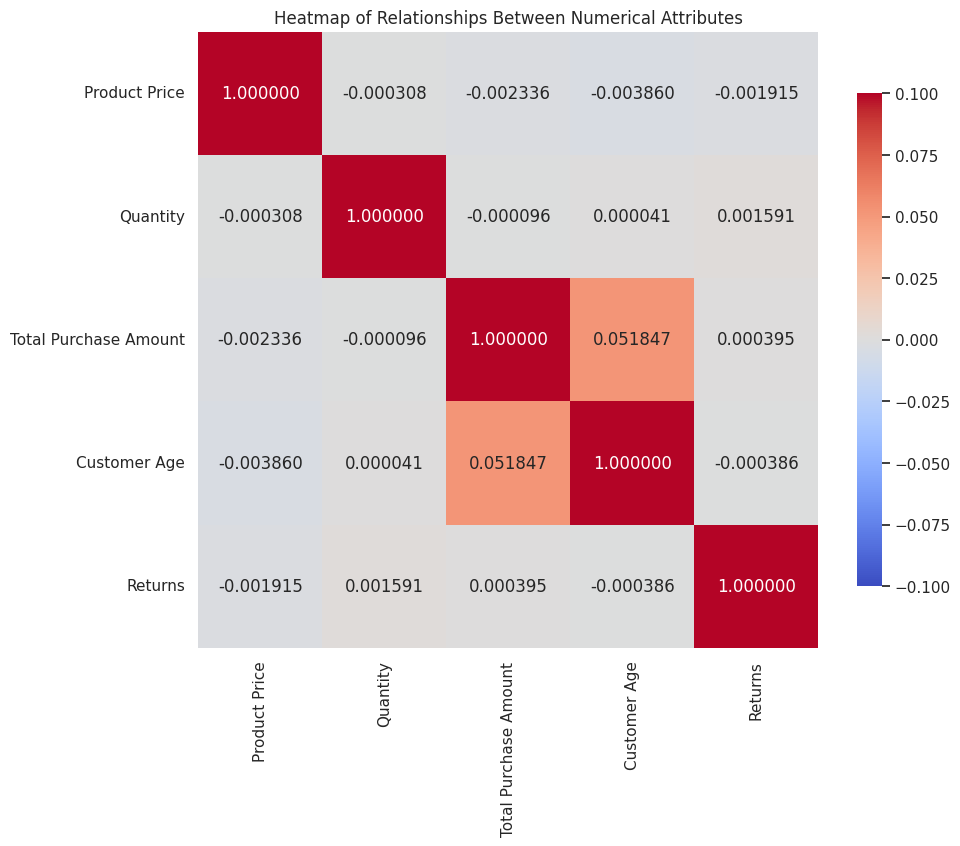

In [5]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler


# Convert Purchase Date to datetime
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])

# Define relevant attributes
relevant_attributes = ['Product Category',
                      'Total Purchase Amount',
                      'Customer Age', 'Returns', 'Gender']

# Summary statistics for numerical attributes
numerical_attributes = [ 'Total Purchase Amount', 'Customer Age', 'Returns']

# Calculate mean, median, mode, and standard deviation for numerical attributes
means = data[numerical_attributes].mean()
medians = data[numerical_attributes].median()
std_dev = data[numerical_attributes].std()

# Display the statistics
print("\nMeans:\n", means)
print("\nMedians:\n", medians)
print("\nStandard Deviation for Numerical Attributes:\n", std_dev)

# Calculate mode for all relevant attributes, including categorical ones
modes = {}
for column in relevant_attributes:
    modes[column] = data[column].mode().iloc[0]  # Get the first mode for all attributes

print("\nModes for All Attributes:")
for key, value in modes.items():
    print(f"{key}: {value}")

# Calculate entropy for all relevant columns (excluding Purchase Date)
def calculate_entropy(column):
    if column.dtype == 'object' or column.nunique() < 10:  # Categorical
        distribution = column.value_counts(normalize=True)
        return entropy(distribution)
    elif np.issubdtype(column.dtype, np.number):  # Numerical, bin into categories
        bins = np.histogram_bin_edges(column, bins='auto')
        binned_counts = np.histogram(column, bins=bins)[0]
        distribution = binned_counts / binned_counts.sum()
        return entropy(distribution)

# Entropy calculations for relevant attributes
entropies = {col: calculate_entropy(data[col]) for col in relevant_attributes}
print("\nEntropy Values for All Relevant Attributes:")
for key, value in entropies.items():
    print(f"{key}: {value}")

scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical attributes
data[numerical_attributes] = scaler.fit_transform(data[numerical_attributes])

# Visualize distributions
plt.figure(figsize=(15, 10))

# Product Price
plt.subplot(2, 3, 1)
sns.histplot(data['Product Price'], bins=30, kde=True)
plt.title('Product Price Distribution')
plt.xlabel('Product Price')
plt.ylabel('Frequency')

# Quantity
plt.subplot(2, 3, 2)
sns.histplot(data['Quantity'], bins=30, kde=True)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Total Purchase Amount
plt.subplot(2, 3, 3)
sns.histplot(data['Total Purchase Amount'], bins=30, kde=True)
plt.title('Total Purchase Amount Distribution')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Frequency')

# Customer Age
plt.subplot(2, 3, 4)
sns.histplot(data['Customer Age'], bins=30, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')

# Returns
plt.subplot(2, 3, 5)
sns.countplot(x='Returns', data=data)
plt.title('Returns Distribution')
plt.xlabel('Returns (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Gender
plt.subplot(2, 3, 6)
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

categorical_attributes = ['Product Category', 'Gender']

# Compute the correlation matrix for numerical attributes
numerical_corr = data[numerical_attributes].corr()
# Print the correlation values for numerical attributes
print("\nCorrelation Values for Numerical Attributes:")
print(numerical_corr)


# Plot the heatmap for numerical correlations with a softer color gradient
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_corr, annot=True, fmt=".6f", cmap='coolwarm', center=0,
            vmin=-0.1, vmax=0.1, cbar_kws={"shrink": .8})  # Use a soft blue color map
plt.title('Heatmap of Relationships Between Numerical Attributes')
plt.show()





Mode for Churn: 0

Counts for Churn (0 and 1):
 Churn
0    200126
1     49874
Name: count, dtype: int64


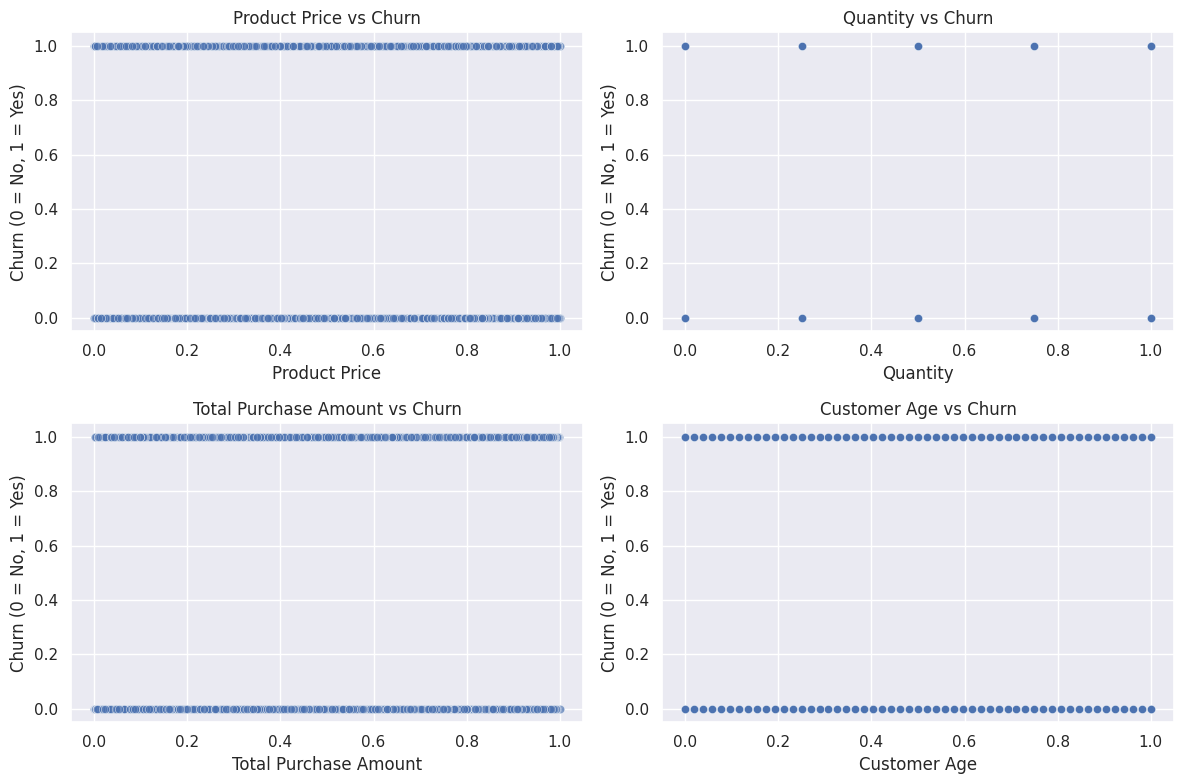

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate mode and counts of 0 and 1 for churn
mode_churn = data['Churn'].mode()[0]  # Get the first mode for churn
counts_churn = data['Churn'].value_counts()

print("\nMode for Churn:", mode_churn)
print("\nCounts for Churn (0 and 1):\n", counts_churn)

# Scatter plots for numerical attributes against churn
num_attributes = len(numerical_attributes)  # Get the number of numerical attributes
cols = 2  # Define number of columns for subplots
rows = (num_attributes + cols - 1) // cols  # Calculate the required number of rows

plt.figure(figsize=(12, 4 * rows))  # Adjust figure size based on number of rows
for i, attribute in enumerate(numerical_attributes):
    plt.subplot(rows, cols, i + 1)  # Adjust subplot based on rows and cols
    sns.scatterplot(x=data[attribute], y=data['Churn'], alpha=0.6)
    plt.title(f'{attribute} vs Churn')
    plt.xlabel(attribute)
    plt.ylabel('Churn (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()


Analysis for the attribute to
be considered at the output to be predicted.

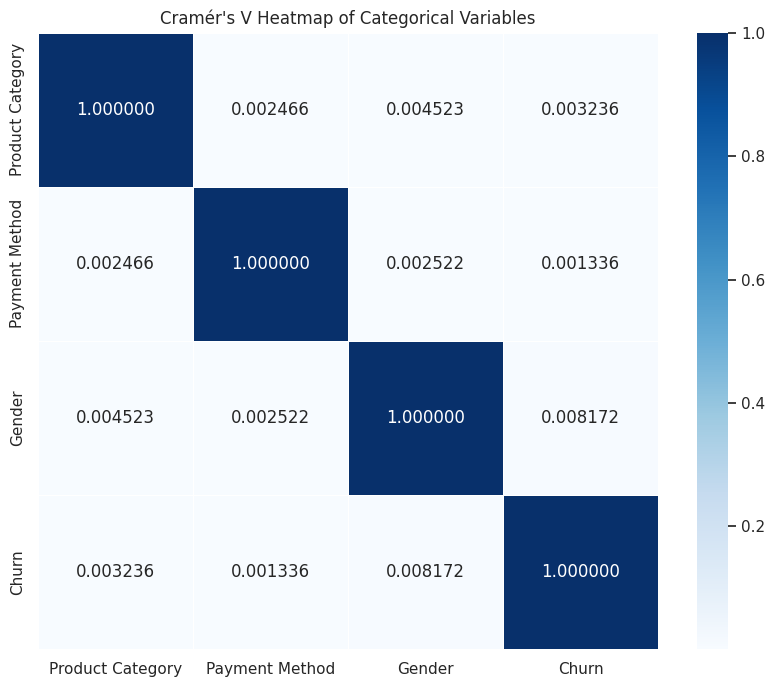

In [7]:

import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to compute Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

# List of categorical columns you want to calculate correlations for
categorical_columns = ['Product Category', 'Payment Method', 'Gender', 'Churn']

# Create an empty dataframe to store Cramér's V values
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                                index=categorical_columns, columns=categorical_columns)

# Calculate Cramér's V between each pair of categorical columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0  # Same column correlation is 1
        else:
            confusion_matrix = pd.crosstab(data[col1], data[col2])
            cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

# Plot a heatmap of Cramér's V correlations
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap="Blues", fmt=".6f", linewidths=0.5)
plt.title("Cramér's V Heatmap of Categorical Variables")
plt.show()






In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  float64       
 4   Quantity               250000 non-null  float64       
 5   Total Purchase Amount  250000 non-null  float64       
 6   Payment Method         250000 non-null  object        
 7   Customer Age           250000 non-null  float64       
 8   Returns                202404 non-null  float64       
 9   Customer Name          250000 non-null  object        
 10  Age                    250000 non-null  int64         
 11  Gender                 250000 non-null  object        
 12  Churn                  250000 non-null  int6

In [9]:
import pandas as pd

def check_data_cleanliness(data):
    # Check for missing values
    if data.isnull().values.any():
        print("Data contains missing values.\n")
        print("Summary of missing values per column:")
        print(data.isnull().sum())
    else:
        print("No missing values found in the data.")

    # Check for duplicate rows
    duplicates = data.duplicated().sum()
    if duplicates > 0:
        print(f"\nData contains {duplicates} duplicate rows.")
    else:
        print("\nNo duplicate rows found.")

    # Check for any unexpected data types
    print("\nData types of each column:")
    print(data.dtypes)

# Replace missing values in the 'Returns' column with the mean value of the column
data['Returns'] = data['Returns'].fillna(data['Returns'].mean())

# Verify that there are no more missing values in the 'Returns' column
print(data['Returns'].isnull().sum())
print("\nUpdated Data Preview:")
print(data.head())  # Display the first few rows to verify the update

# Example usage:
# Assuming your data is already loaded into a DataFrame called 'data'
check_data_cleanliness(data)


0

Updated Data Preview:
   Customer ID       Purchase Date Product Category  Product Price  Quantity  \
0        46251 2020-09-08 09:38:32      Electronics       0.004082      0.50   
1        46251 2022-03-05 12:56:35             Home       0.934694      0.75   
2        46251 2022-05-23 18:18:01             Home       0.567347      0.25   
3        46251 2020-11-12 13:13:29         Clothing       0.379592      0.00   
4        13593 2020-11-27 17:55:11             Home       0.895918      0.00   

   Total Purchase Amount Payment Method  Customer Age  Returns  \
0               0.121905    Credit Card      0.365385      0.0   
1               0.502667         PayPal      0.365385      0.0   
2               0.589714         PayPal      0.365385      0.0   
3               0.649333         PayPal      0.365385      0.0   
4               0.638476    Credit Card      0.596154      0.0   

         Customer Name  Age  Gender  Churn  
0  Christine Hernandez   37    Male      0  
1  Chri

In [10]:
!pip install hmmlearn


In [ ]:
import numpy as np
from hmmlearn import hmm
import pandas as pd

# Ensure data is loaded; replace this with your actual data loading code
# data = pd.read_csv('your_data_file.csv')

# Convert categorical columns to numeric codes
data['Product Category Code'] = data['Product Category'].astype('category').cat.codes
data['Payment Method Code'] = data['Payment Method'].astype('category').cat.codes
data['Gender Code'] = data['Gender'].astype('category').cat.codes

# Create a unique representation of hidden states by combining the relevant attributes
# Here, we can use a tuple of the encoded values to create unique hidden states
data['Hidden State'] = list(zip(data['Product Category Code'], data['Product Price'],
                                 data['Quantity'], data['Total Purchase Amount'],
                                 data['Payment Method Code'], data['Customer Age'],
                                 data['Returns'], data['Gender Code']))

# Convert the 'Hidden State' tuples to unique numeric codes for HMM processing
data['Hidden State Code'] = data['Hidden State'].astype('category').cat.codes

# Define hidden states and observed states
hidden_states = data['Hidden State Code'].values.reshape(-1, 1)  # Reshape for HMM
observed_states = data['Churn'].values  # Churn is your observed state

# Initial State Probabilities
initial_state_counts = data['Hidden State Code'].value_counts(normalize=True)
initial_state_probabilities = initial_state_counts.values
print("Initial State Probabilities:", initial_state_probabilities)

# Number of unique hidden states based on all relevant attributes
n_states = len(data['Hidden State Code'].unique())
print(f"Number of Unique Hidden States: {n_states}")

# Transition Counts
transition_counts = np.zeros((n_states, n_states))

# Calculate transition counts based on hidden states
for i in range(len(hidden_states) - 1):
    transition_counts[hidden_states[i], hidden_states[i + 1]] += 1

# Normalize to get transition probabilities
transition_probabilities = (transition_counts.T / transition_counts.sum(axis=1)).T
transition_probabilities = np.nan_to_num(transition_probabilities)  # Handle any NaNs
print("\nTransition Probabilities:\n", transition_probabilities)

# Emission Probabilities
n_observed_states = len(np.unique(observed_states))
emission_counts = np.zeros((n_states, n_observed_states))

for i in range(len(hidden_states)):
    emission_counts[hidden_states[i], observed_states[i]] += 1

# Normalize to get emission probabilities
emission_probabilities = (emission_counts.T / emission_counts.sum(axis=1)).T
emission_probabilities = np.nan_to_num(emission_probabilities)  # Handle any NaNs
print("\nEmission Probabilities:\n", emission_probabilities)

# Create the HMM model with the desired number of hidden states
n_components = min(n_states, 249999)  # Adjust the number of hidden states
model = hmm.MultinomialHMM(n_components=n_components, n_iter=100)  # Use MultinomialHMM for categorical data

# Drop rows with NaN values to avoid fitting errors
data.dropna(subset=['Hidden State Code', 'Churn'], inplace=True)

# Fit the model on hidden states
model.fit(hidden_states)

# Predict hidden states based on the fitted model
hidden_state_predictions = model.predict(hidden_states)

# # Print the first 60 predicted hidden states
# print("First 60 Predicted Hidden States:")
# print(hidden_state_predictions[:60])  # Display the first 60 hidden states

# Calculate the log probability of the observed sequence and convert to probability
# Note: In a MultinomialHMM, observed_states should be reshaped for fitting
observed_states_reshaped = observed_states.reshape(-1, 1)
probability_of_churn = np.exp(model.score(observed_states_reshaped))

print("\nEstimated Probability of Churn based on Hidden States Sequence:", probability_of_churn)


Initial State Probabilities: [8.e-06 4.e-06 4.e-06 ... 4.e-06 4.e-06 4.e-06]
Number of Unique Hidden States: 249999


In [ ]:
unique_hidden_states = np.unique(hidden_states, axis=0)  # Get unique rows
num_hidden_states = len(unique_hidden_states)
print("Number of Unique Hidden States:", num_hidden_states)